In [2]:
#Importing Libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('/Users/mandy/Documents/FTDS/ML_Project(DS_jobchange)/genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


# EDA AND CLEANING


Table 1. Spotify audio features.

Attribute                     Scale                         Explanation

Acousticness                  0 - 1                         Measures the likelihood a track is acoustic, where                                                             1 represents high confidence that a track is                                                                   acoustic.

Danceability                  0 - 1                         Describes how suitable a track is for dancing.                                                                 Danceability incorporated tempo, rhythm stability,                                                             beat strength, and overall regularity.


Duration (ms)                 n/a                           Quantifies the length of the track in milliseconds.



Energy                        0 - 1                         Represents a perceptual measure of intensity and                                                               activity in the song. Energetic tracks are fast,                                                               loud, and noisy (i.e. rock music).


Instrumentalness              0 - 1                         Predicts the likelihood that a track has no vocals.


Key                           0-11                          A dummy variable representing the estimated overall                                                             key of the track in pitch class notation, where                                                                 integer values represent different notes. For                                                                   example, 0 = C, 4= E, 7 = G, 11 = B.

Liveness                      0 - 1                         Accounts for the presence of an audience in the                                                                 recording. Studio recordings with minimal                                                                       background noises score low.                    

Loudness                      -60 - 0 (dB)                  The loudness of a track measured on a negative                                                                 decibel (dB) scale averaged across the entire                                                                   track. 0dB is a upper-bound on loudness whereas                                                                 -60dB is the quietest a track can be.

Mode                            0 or 1                      Indicates whether a song is Major (1) or minor (0).

Speechiness*                     0 - 1                      Detects the presence of spoken words in the track.                                                             The more exclusively speech-like the recording, the                                                             closer to 1 the attribute value.

Tempo                         Beats per minute              Estimated tempo of a track in BPM.
                                (BPM)          

Valence                          0 - 1                      The musical positiveness conveyed by the track.                                                                 Songs with high valence sound happy, while low                                                                 valence songs sound negative.


   Note: Audio features and descriptions were obtained from Spotify for Developers. All features are included here except for Time Signature because almost all tracks were in 4/4 time.
*The difference between speechiness and instrumentalness is that speechiness only increases when there are exclusively spoken words (e.g. from a poem, talk show, or audio book). Instrumentalness measures the probability of no voice on a track at all.

In [15]:
df=df.drop(columns = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [6]:
df.key.value_counts()

1     7537
7     4275
11    4150
6     3714
0     3470
8     3345
9     3254
10    3251
2     3047
5     2994
4     2368
3      900
Name: key, dtype: int64

In [7]:
X = df.drop(columns='genre')
y = df['genre']

In [8]:
print(X)
print(y)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo

In [9]:
df.isna().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
genre               False
dtype: bool

In [10]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [11]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


# Visualization

<AxesSubplot:xlabel='energy', ylabel='genre'>

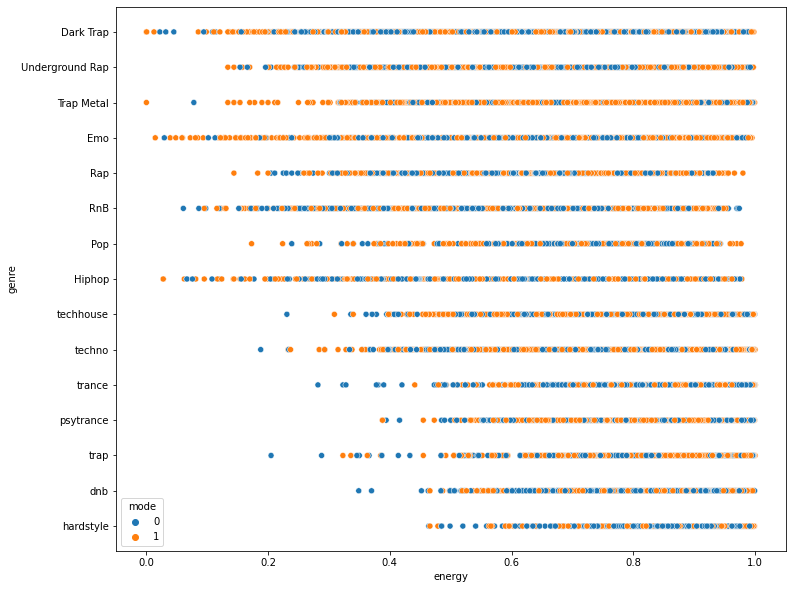

In [11]:
plt.subplots(figsize=(12,10))
sns.scatterplot(x='energy',y='genre',data=df, hue='mode')

Indicates whether a song is Major (1) or minor (0). Given the scatterplot we can say that every genre from Dark Trap to Hip hop covers the whole energy level while techhouse to hardstyle, besides some outliers, covers the upper region of energy levels

<AxesSubplot:xlabel='tempo', ylabel='genre'>

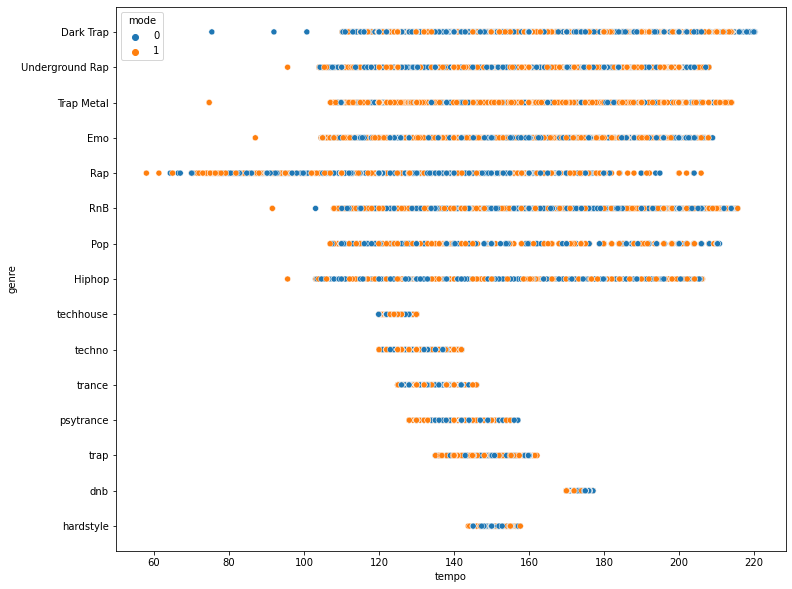

In [12]:
plt.subplots(figsize=(12,10))
sns.scatterplot(x='tempo',y='genre',data=df, hue='mode')

Rap covers the whole tempo range while techhouse to hardstyle remain within short well defined tempo limits.

<AxesSubplot:xlabel='genre', ylabel='count'>

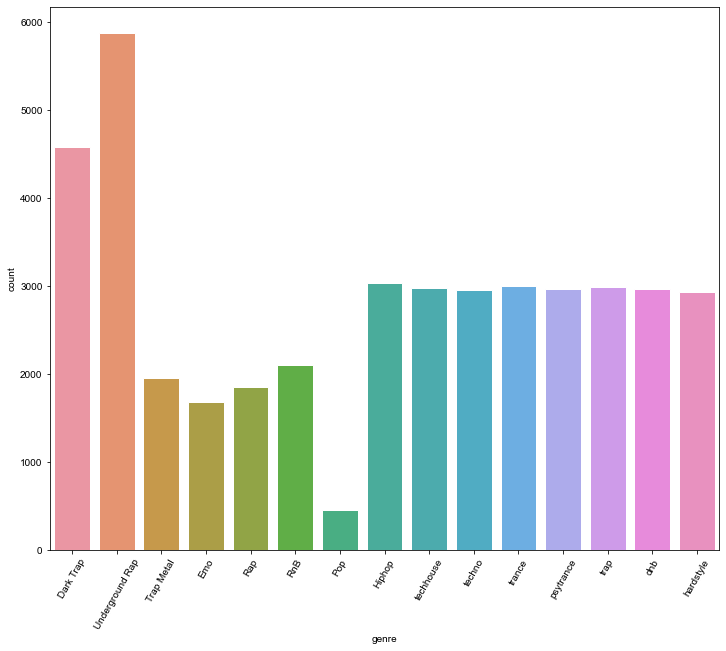

In [13]:
plt.subplots(figsize=(12,10))
plt.xticks(rotation=60)
sns.set_theme(style="darkgrid")
sns.countplot(x="genre", data=df)

this graph shows that we put an emphasis away from pop culture into sub music genres.

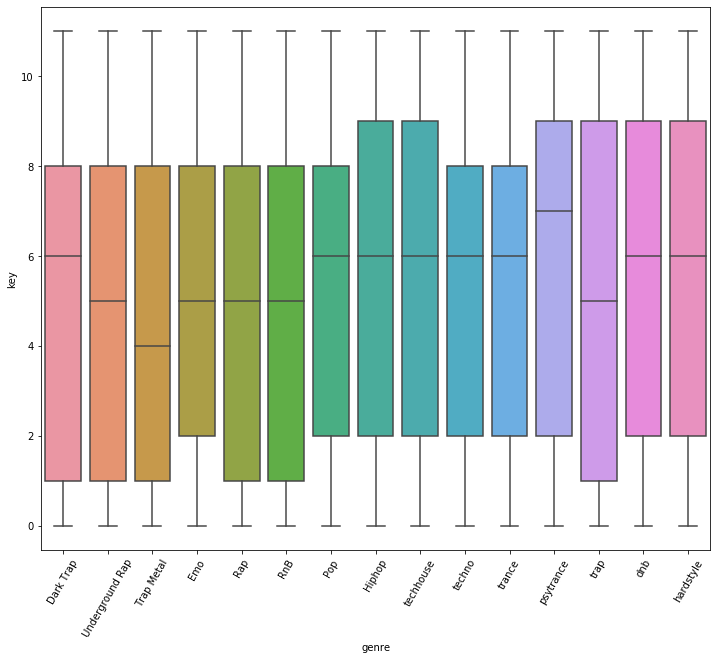

In [12]:
plt.subplots(figsize=(12,10))
plt.xticks(rotation=60)
sns.boxplot(data=df,x="genre",y='key')

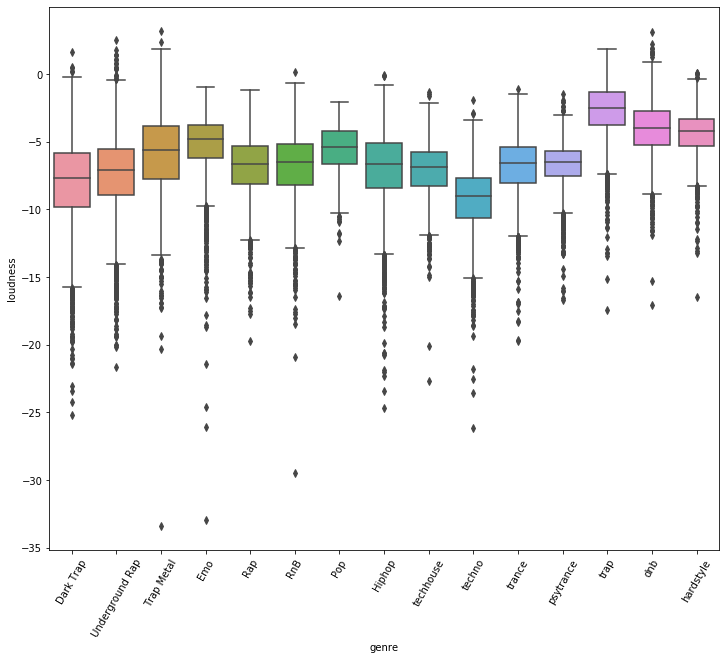

In [16]:
plt.subplots(figsize=(12,10))
plt.xticks(rotation=60)
sns.boxplot(data=df,x="genre",y='loudness')

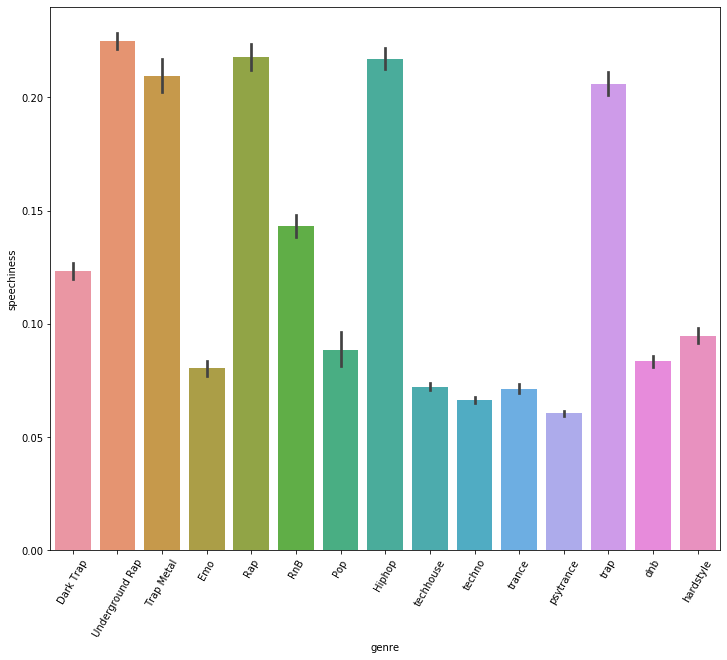

In [17]:
plt.subplots(figsize=(12,10))
plt.xticks(rotation=60)
sns.barplot(data=df,x="genre",y='speechiness')	

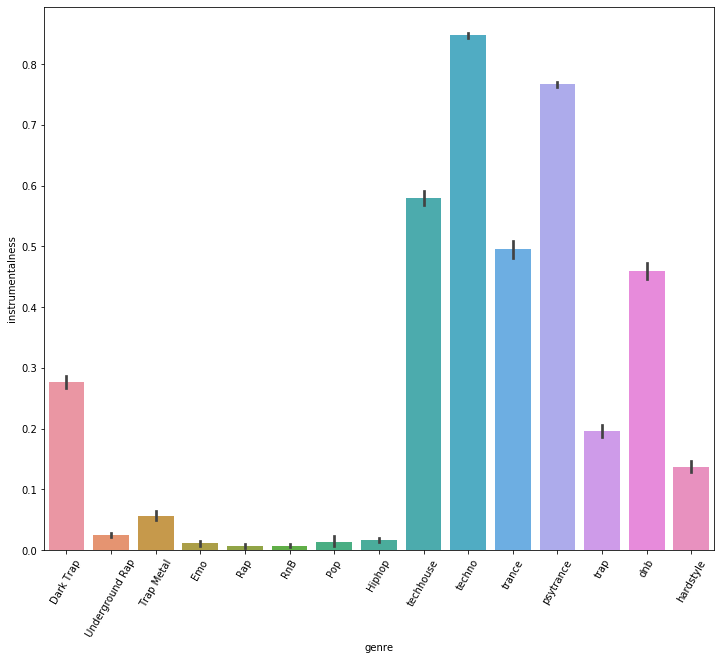

In [18]:
plt.subplots(figsize=(12,10))
plt.xticks(rotation=60)
sns.barplot(data=df,x="genre",y='instrumentalness')	